Libraries needed to install

In [ ]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=c7cb3b7f2203bd025bd3115a06440408a70737ca97762324174a78204413076c
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


Import the libraries into codebase

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

Stock Price Info on Facebook (Meta)

In [ ]:
FB_info = yf.Ticker("META")
print("Open Price:", FB_info.info['open'])
print("Current Price:", FB_info.info['currentPrice'])
print("Target Price:", FB_info.info['targetMedianPrice'])
print("52 Week Growth:", FB_info.info['52WeekChange'])
print("PEG Ratio:", FB_info.info['pegRatio'])

Open Price: 137.085
Current Price: 132.8
Target Price: 205
52 Week Growth: -0.6103058
PEG Ratio: 2.01


Stock Price Info on Twitter

In [ ]:
Twit = yf.Ticker("TWTR")
print("Open Price:", Twit.info['open'])
print("Current Price:", Twit.info['currentPrice'])
print("Target Price:", Twit.info['targetMedianPrice'])
print("52 Week Growth:", Twit.info['52WeekChange'])
print("PEG Ratio:", Twit.info['pegRatio'])

Open Price: 51.1
Current Price: 51.78
Target Price: 45
52 Week Growth: -0.21306992
PEG Ratio: 0.45


Now Let's Compare Tickers

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()

FB_data = pdr.get_data_yahoo("META", start ="2021-10-18", end="2022-10-18")
print(FB_data)
TWTR_data = pdr.get_data_yahoo("TWTR", start ="2021-10-18", end="2022-10-18")
print(TWTR_data)

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2021-10-18 00:00:00-04:00  328.950012  335.890015  327.500000  335.339996   
2021-10-19 00:00:00-04:00  339.649994  342.459991  337.279999  339.989990   
2021-10-20 00:00:00-04:00  343.450012  343.980011  339.450012  340.779999   
2021-10-21 00:00:00-04:00  340.279999  342.309998  337.799988  341.880005   
2021-10-22 00:00:00-04:00  326.350006  329.630005  321.109985  324.609985   
...                               ...         ...         ...         ...   
2022-10-11 00:00:00-04:00  131.619995  132.660004  126.989998  128.539993   
2022-10-12 00:00:00-04:00  128.320007  129.669998  126.250000  127.500000   
2022-10-13 00:00:00-04:00  123.529999  131.139999  122.529999  130.289993   
2022-10-14 00:00:00-04:00  131.000000  131.789993  126.519997  126.760002   
2022-10

Hard to read so lets make it easier:

In [ ]:
graph_metadata = yf.download("META TWTR", start ="2021-10-18", end="2022-10-18", interval = "1wk", group_by="tickers")
graph_metadata.stack(0).reset_index().rename(columns={'level_1':'Ticker'})

[*********************100%***********************]  2 of 2 completed


,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2021-10-18,META,324.609985,324.609985,343.980011,321.109985,328.950012,105589700
1,2021-10-18,TWTR,62.240002,62.240002,68.410004,62.090000,62.689999,66339700
2,2021-10-25,META,323.570007,323.570007,330.209991,308.109985,320.299988,221901000
3,2021-10-25,TWTR,53.540001,53.540001,63.080002,53.150002,61.520000,123999100
4,2021-11-01,META,341.130005,341.130005,346.790009,323.200012,326.040009,130026500
...,...,...,...,...,...,...,...,...
101,2022-10-03,TWTR,49.180000,49.180000,52.299999,42.230000,43.900002,240945300
102,2022-10-10,META,126.760002,126.760002,136.110001,122.529999,133.550003,154974900
103,2022-10-10,TWTR,50.450001,50.450001,51.070000,49.500000,49.660000,74402800
104,2022-10-17,META,132.800003,132.800003,137.839996,130.179993,130.300003,54980000


Individual Graphs for TWTR and Meta

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


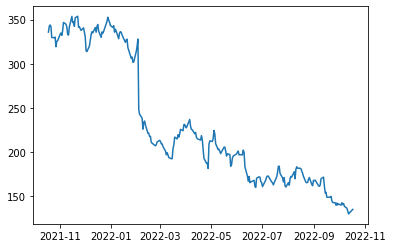

<function matplotlib.pyplot.show(*args, **kw)>

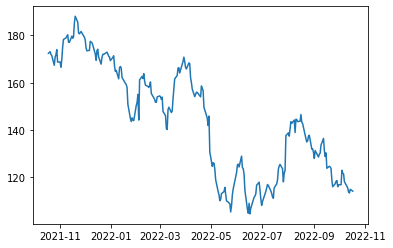

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def high_stock (ticker):
  Asset = pd.DataFrame(yf.download(ticker, start='2021-10-18', end='2022-10-18') ['High'])
  return Asset

META_high = high_stock('META')
TWTR_high = high_stock('AMZN')

plt.plot(META_high)
plt.show()

plt.plot(TWTR_high)
plt.show

Let's make it easier to distinguish the graphs:

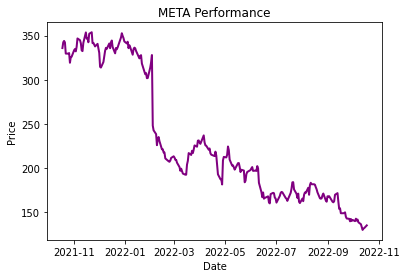

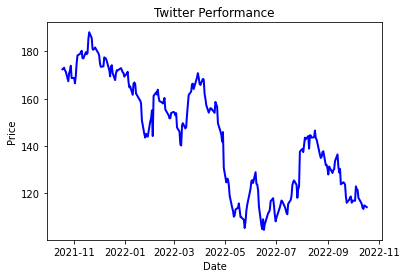

In [ ]:
def highest_ticker(ticker, color, head):
  plt.plot(ticker, color=color, linewidth=2)
  plt.title(head)
  plt.ylabel('Price')
  plt.xlabel('Date')
  plt.show()

META_plot = highest_ticker(META_high, 'purple', 'META Performance')
TWTR_plot = highest_ticker(TWTR_high, 'blue', 'Twitter Performance')